In [1]:
import networkx as nx
import nxpd
nxpd.nxpdParams['show'] = 'ipynb'

In [2]:
def collapse_causal_graph(G: nx.MultiDiGraph):
    H = G
    while True:
        for u, v, _ in H.edges:
            if H.in_degree(v) == 1 and H.out_degree(v) == 1:
                H = nx.contracted_nodes(H, u, v, self_loops=False)
                break
        else:
            break
    print(H)
    return H

def find_single_edge_cuts(G: nx.MultiDiGraph):
    cuts = []
    for cut in G.edges:
        H = nx.restricted_view(G, [], [cut])
        if not nx.is_weakly_connected(H):
            cuts.append(cut)
    return cuts

def find_blocks(G: nx.MultiDiGraph):
    blocks = []
    linear_blocks = find_single_edge_cuts(G)
    blocks += [[lb] for lb in linear_blocks]
    H = nx.restricted_view(G, [], linear_blocks)
    for h in nx.weakly_connected_component_subgraphs(H):
        if len(h) > 1:
            blocks += [h.edges]
    return blocks

def draw_graph(G: nx.MultiDiGraph, filename=None, copy=True):
    if copy:
        H = G.copy()
    else:
        H = G
    H.graph['rankdir'] = 'LR'
    if filename is not None:
        nxpd.draw(H, filename, show=True)
    else:
        display(nxpd.draw(H))

def draw_clustered_graph(G: nx.MultiDiGraph, blocks, filename=None):
    H = G.copy()
    colors = ('red', 'orange', 'greenyellow', 'seagreen', 'royalblue', 'navy')
    colit = iter(colors)
    for block in blocks:
        color = next(colit)
        for start, end, n in block:
            H.edges[start, end, n]['color'] = color
    draw_graph(H, filename, False)

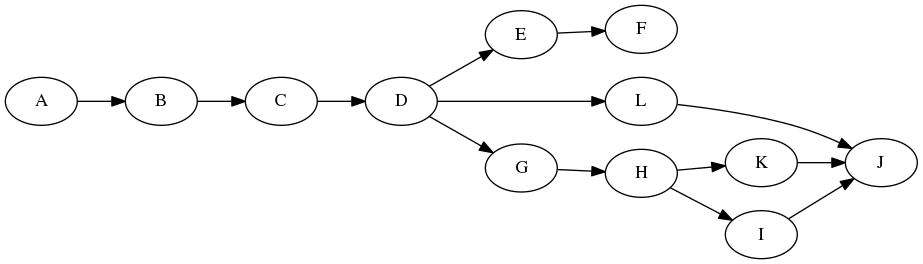

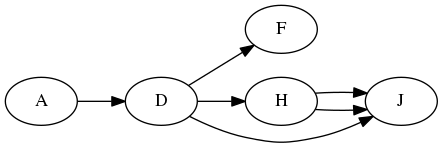

In [3]:
G0 = nx.MultiDiGraph(['AB', 'BC', 'CD', 'DE', 'EF', 'DG', 'GH', 'HI', 'IJ', 'HK', 'KJ', 'DL', 'LJ'])
draw_graph(G0)
draw_graph(collapse_causal_graph(G0))

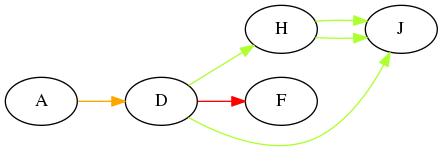

In [4]:
G1 = nx.MultiDiGraph(['AD', 'DH', 'DJ', 'DF', 'HJ', 'HJ'])
blocks = find_blocks(G1)
draw_clustered_graph(G1, blocks)

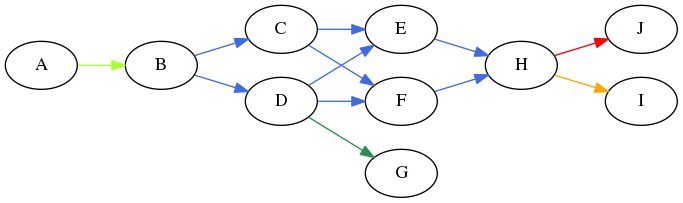

In [5]:
G2 = nx.MultiDiGraph(rankdir='LR')
G2.add_edges_from(('AB', 'BC', 'BD', 'CE', 'CF', 'DE', 'DF', 'DG', 'EH', 'FH', 'HI', 'HJ'))
blocks = find_blocks(G2)
draw_clustered_graph(G2, blocks)

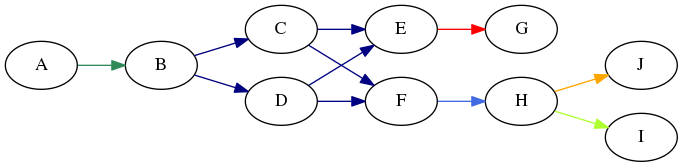

In [6]:
G3 = nx.MultiDiGraph(rankdir='LR')
G3.add_edges_from(('AB', 'BC', 'BD', 'CE', 'CF', 'DE', 'DF', 'EG', 'FH', 'HI', 'HJ'))
blocks = find_blocks(G3)
draw_clustered_graph(G3, blocks)

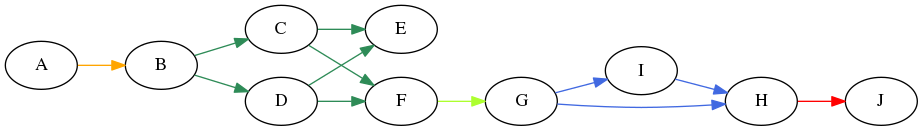

In [7]:
G4 = nx.MultiDiGraph(rankdir='LR')
G4.add_edges_from(('AB', 'BC', 'BD', 'CE', 'CF', 'DE', 'DF', 'FG', 'GH', 'GI', 'IH', 'HJ'))
blocks = find_blocks(G4)
draw_clustered_graph(G4, blocks)

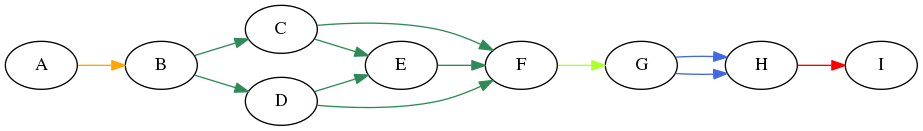

In [8]:
G5 = nx.MultiDiGraph(rankdir='LR')
G5.add_edges_from(('AB', 'BC', 'BD', 'CE', 'CF', 'DE', 'DF', 'EF', 'FG', 'GH', 'GH', 'HI'))
blocks = find_blocks(G5)
draw_clustered_graph(G5, blocks)

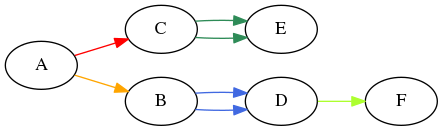

In [9]:
G6 = nx.MultiDiGraph(rankdir='LR')
G6.add_edges_from(('AB', 'AC', 'BD', 'BD', 'CE', 'CE', 'DF'))
blocks = find_blocks(G6)
draw_clustered_graph(G6, blocks)